In [31]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import permutations
from itertools import combinations
from itertools import combinations_with_replacement

In [32]:
states = np.array([0,1])
prior = np.array([0.2,0.8])


T = np.array([[0.8,0.2],[0.2,0.8]])
E = np.array([[0.5,0.9],[0.5,0.1,]])

DictO = {"C":0,"S":1} 

#Obs = np.array([0,1,1,1,0,1,0,1])
Obs= np.array([1,0,0,0,1,0,1,0])# 0 Cara, 1 Sello

def GetHiddenStates(States, N):
    
    CStates = list( combinations_with_replacement(States,N) )
    
    Permu = []
    
    for it in CStates:
        p = list(permutations(it,N))
        
        for i in p:
            if i not in Permu:
                Permu.append(i)
    
    #print(CStates)
    return np.array(Permu)

HiddenStates = GetHiddenStates(states,8)  
print(len(HiddenStates))  
print(HiddenStates[32])
#T[2,1]

256
[1 0 0 0 0 1 0 0]


El estado oculto mas probable es [[1 1 1 1 0 0 0 0]] pues este tiene una probabilidad de 0.0001911029760000001


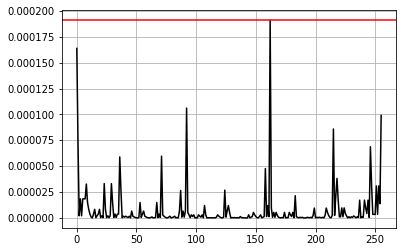

In [33]:
def GetProb(T,E,Obs,State,Prior):
    n= len(Obs)
    p=1
    p*= Prior[State[0]]

    for i in range(n-1):
        p *= T[ State[i+1],State[i]]
    #print(p,State)
    
    for i in range(n):
        p *= E[ Obs[i], State[i] ]
    
    return p

dim= len(HiddenStates)
P= np.zeros(dim)



for i in range(dim):
    P[i]= GetProb(T,E,Obs,HiddenStates[i],prior)

maxP = np.max(P)
ii = np.where( P == np.amax(P))
print("El estado oculto mas probable es",HiddenStates[ii],"pues este tiene una probabilidad de",maxP)


plt.plot(P,color='k')
#plt.axhline(y=maxP)
plt.grid()
plt.axhline(y=maxP,color="r")


In [34]:
ObsStates = GetHiddenStates([0,1],8)


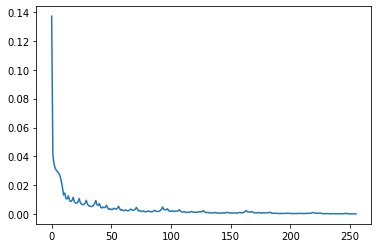

In [35]:
NObs = ObsStates.shape[0]

PObs = np.zeros(NObs)

for j in range(NObs):
    
    dim = HiddenStates.shape[0]
    P = np.zeros(dim)
    
    for i in range(dim):
        P[i] = GetProb(T,E,ObsStates[j],HiddenStates[i],prior)
        
    PObs[j] = np.sum(P)
plt.plot(PObs)

In [36]:
maxP = np.max(PObs)
ii = np.where( PObs == np.amax(PObs))
print(ObsStates[ii],maxP)

print("La suma de todos los estados observables es:")
np.sum(PObs)

[[0 0 0 0 0 0 0 0]] 0.13698241367042568
La suma de todos los estados observables es:


1.0000000000000007

In [37]:
print("e:")
print("Si cambiamos el prior cambian tanto las probabilidades de los estados ocultos como de los observables.")
print("Eso si, la suma de los observables sigue dando uno si los valores componentes del prior dan 1 en su suma.")
print("Mostraremos a continuacion las graficas y valores que nos dan si cambiamos el prior.")

e:
Si cambiamos el prior cambian tanto las probabilidades de los estados ocultos como de los observables.
Eso si, la suma de los observables sigue dando uno si los valores componentes del prior dan 1 en su suma.
Mostraremos a continuacion las graficas y valores que nos dan si cambiamos el prior.


El estado oculto mas probable es [[0 0 0 0 0 0 0 0]] pues este tiene una probabilidad de 0.0004096000000000002


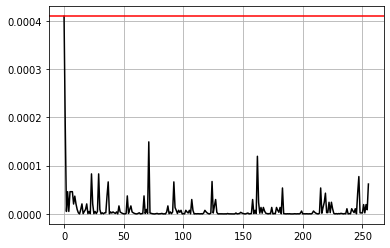

In [38]:
prior = np.array([0.5,0.5])
for i in range(dim):
    P[i]= GetProb(T,E,Obs,HiddenStates[i],prior)

maxP = np.max(P)
ii = np.where( P == np.amax(P))
print("El estado oculto mas probable es",HiddenStates[ii],"pues este tiene una probabilidad de",maxP)


plt.plot(P,color='k')
#plt.axhline(y=maxP)
plt.grid()
plt.axhline(y=maxP,color="r")


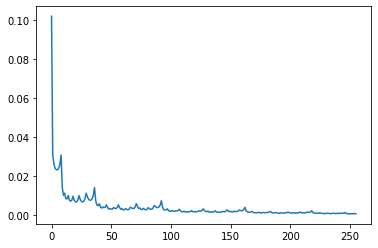

In [39]:
ObsStates = GetHiddenStates([0,1],8)
NObs = ObsStates.shape[0]

PObs = np.zeros(NObs)

for j in range(NObs):
    
    dim = HiddenStates.shape[0]
    P = np.zeros(dim)
    
    for i in range(dim):
        P[i] = GetProb(T,E,ObsStates[j],HiddenStates[i],prior)
        
    PObs[j] = np.sum(P)
plt.plot(PObs)

In [40]:
maxP = np.max(PObs)
ii = np.where( PObs == np.amax(PObs))
print(ObsStates[ii],maxP)

print("La suma de todos los estados observables es con este nuevo prior aun:")
np.sum(PObs)

[[0 0 0 0 0 0 0 0]] 0.10197834735577609
La suma de todos los estados observables es con este nuevo prior aun:


1.0000000000000007